# Explore here

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv', sep = ',')

In [3]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [8]:
variables = df.columns
print("//   ".join(variables))

fips//   TOT_POP//   0-9//   0-9 y/o % of total pop//   19-Oct//   10-19 y/o % of total pop//   20-29//   20-29 y/o % of total pop//   30-39//   30-39 y/o % of total pop//   40-49//   40-49 y/o % of total pop//   50-59//   50-59 y/o % of total pop//   60-69//   60-69 y/o % of total pop//   70-79//   70-79 y/o % of total pop//   80+//   80+ y/o % of total pop//   White-alone pop//   % White-alone//   Black-alone pop//   % Black-alone//   Native American/American Indian-alone pop//   % NA/AI-alone//   Asian-alone pop//   % Asian-alone//   Hawaiian/Pacific Islander-alone pop//   % Hawaiian/PI-alone//   Two or more races pop//   % Two or more races//   POP_ESTIMATE_2018//   N_POP_CHG_2018//   GQ_ESTIMATES_2018//   R_birth_2018//   R_death_2018//   R_NATURAL_INC_2018//   R_INTERNATIONAL_MIG_2018//   R_DOMESTIC_MIG_2018//   R_NET_MIG_2018//   Less than a high school diploma 2014-18//   High school diploma only 2014-18//   Some college or associate's degree 2014-18//   Bachelor's degree or hi

In [4]:
# Miro de qué tipode variables está compuesto el dataset
types= df.dtypes
df_types = pd.DataFrame(types, index= df.columns, columns= ['Type'])
df_types.value_counts()

Type   
float64    61
int64      45
object      2
Name: count, dtype: int64

In [5]:
# Busco dónde se encuentran posicionados las variables tipo "object"
np.where(df_types == 'object')

(array([78, 79]), array([0, 0]))

In [6]:
#Saco el nombre d estas variables
df_types.iloc[[78, 79]]

,Type
COUNTY_NAME,object
STATE_NAME,object


In [7]:
# Utilizo la función nunique para comprovar cuantos valores puede tomar estas dos variables para determinar que tipo de codificación debería hacer
df[['COUNTY_NAME', 'STATE_NAME']].nunique()

COUNTY_NAME    1841
STATE_NAME       51
dtype: int64

Viendo el resultado obteido de los valores que pueden tomar mis dos variables tipo "object", creo que la mejor opción de codificarlas es hacer un TargetEncoding. Para ello antes voy a tener que imprimir todas las variables y buscar cuál de ellas relacionada con la salud será mi variable objetivo.

In [9]:
df.shape

(3140, 108)

In [ ]:
#Ordeno las variables de mayor a menor cantidad de valores diferentes que pueden tomar.
df_var = df.nunique().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
df_var

In [11]:
#Elimino la variable "fips" porque se trata de un ID
df.drop('fips', axis= 1, inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [17]:
print(sum(df.isna().sum()))

0


In [18]:
#Aquí aplico el Target encoder a mis dos variables tipo object, respecto la variable "Obesity_prevalence". 
import category_encoders as ce 
encoder = ce.TargetEncoder(cols= ['COUNTY_NAME','STATE_NAME'])

df[['COUNTY_ENC', 'STATE_ENC']] = encoder.fit_transform(df[['COUNTY_NAME', 'STATE_NAME']], df['Obesity_prevalence'])

Porque la variable Obesity_prevalence (Prevalencia de obesidad)? 
    · Pienso que la obesidad es un problema de salud dónde actuán varios factores, no solo de tema bioloógico sino también tema demográfico, como por ejemplo por los recursos por la salud, el nivel económico, etc.
    · En este caso, se trata de un dataset ubicado en Estados Unidos, en donde la tasa de obesidad en adultos de los Estados Unidos superó la marca del 40 por ciento por primera vez, exactamente en 42,4 por ciento, según el reporte State of Obesity: Better Policies for a Healthier America, publicado por Trust for America’s Health (TFAH). Polo tanto, considero necesario hacer un análisis de los factores que podrían estar afectando a la prvalencia de obesidad. 
    
    (https://www.bing.com/ck/a?!&&p=1b9b37a8483bf5a8JmltdHM9MTcyNDg4OTYwMCZpZ3VpZD0wNGJhNGVhYi1lYzdmLTY0YjUtMGY0Zi01ZDczZWRkNzY1NjUmaW5zaWQ9NTUwMA&ptn=3&ver=2&hsh=3&fclid=04ba4eab-ec7f-64b5-0f4f-5d73edd76565&psq=%25+obesdidad+EEUU&u=a1aHR0cHM6Ly93d3cudGZhaC5vcmcvYXJ0aWNsZS8yMzc3Ni8jOn46dGV4dD0lMjhXYXNoaW5ndG9uJTJDJTIwREMlMjAlRTIlODAlOTMlMjBTZXB0ZW1iZXIlMjAxNyUyQyUyMDIwMjAlMjklMjAlRTIlODAlOTMlMjBMYSxwdWJsaWNhZG8lMjBob3klMjBwb3IlMjBUcnVzdCUyMGZvciUyMEFtZXJpY2ElRTIlODAlOTlzJTIwSGVhbHRoJTIwJTI4VEZBSCUyOS4&ntb=1)

In [19]:
df.drop(columns=['COUNTY_NAME', 'STATE_NAME'], inplace = True)

Para que no haya problemas con la transformación logarítmica de las variables que tengan un skew alto, decido filtrar el dataset para obtener solo los valores más altos que 0.

In [20]:
# Filtro la lista
df= df[(df > 0).all(axis=1)]

In [21]:
# Devuelve una lista de índices de columnas con un sesgo mayor a 1
var_skew = list(np.where(df.skew() > 1)[0])
var_skew

[np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(9),
 np.int64(11),
 np.int64(13),
 np.int64(15),
 np.int64(17),
 np.int64(19),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(48),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(65),
 np.int64(66),
 np.int64(67),
 np.int64(68),
 np.int64(69),
 np.int64(70),
 np.int64(71),
 np.int64(72),
 np.int64(73),
 np.int64(74),
 np.int64(75),
 np.int64(78),
 np.int64(79),
 np.int64(83),
 np.int64(87),
 np.int64(91),
 np.int64(95),
 np.int64(99),
 np.int64(103)]

Aquí tenemos la posición de cada variable la cuál contiene un sesgo mayor que uno, y podría estar afectar a nuestro modelo de regresión

In [22]:
#para cada columna con skew > 1 creeo una columna nueva columna en escala logarítmica
for idx in var_skew:
    col_name = df.columns[idx]
    df[col_name + '_log'] = np.log(df[col_name]) 

In [23]:
#Elimino esas columnas que han sido transformadas a escala logarítmica
cols_eliminar = df.columns[var_skew].tolist()
df = df.drop(columns=cols_eliminar)

In [24]:
#Compruevo si siguen existiendo columnas con un sesgo > 1
all_skew = df.skew()
indices = list(np.where(df.skew()>1)[0])
columns_to_check = df.columns[indices]

## Filtro el sesgo para las columnas seleccionadas usando los índices
skew_values = all_skew[columns_to_check]

print(skew_values)

20-29 y/o % of total pop_log    1.084392
% NA/AI-alone_log               1.395556
% Two or more races_log         1.237067
Unemployment_rate_2018_log      1.008179
dtype: float64


Aunque existen 4 variables con un sesgo mayor a 1, el sesgo es muy cercano a 1 y voy a decidir mantenerlas en el dataset.

## MODELO

In [25]:
X = df.drop('Obesity_prevalence', axis=1)
y = df['Obesity_prevalence']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Normalizo las variables 
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Regresión lineal sin regularización

In [28]:
#Defino y ajusto el modelo no regularizado
lm = LinearRegression().fit(X_train_sc, y_train)
y_pred_linear_train = lm.predict(X_train_sc)
y_pred_linear_test = lm.predict(X_test_sc)

In [29]:
#Código copicado del notebook
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [30]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.999898,0.028195,0.102674
Test set,0.999880,0.037919,0.145764
Diferencia,-0.000018,0.009724,0.043090


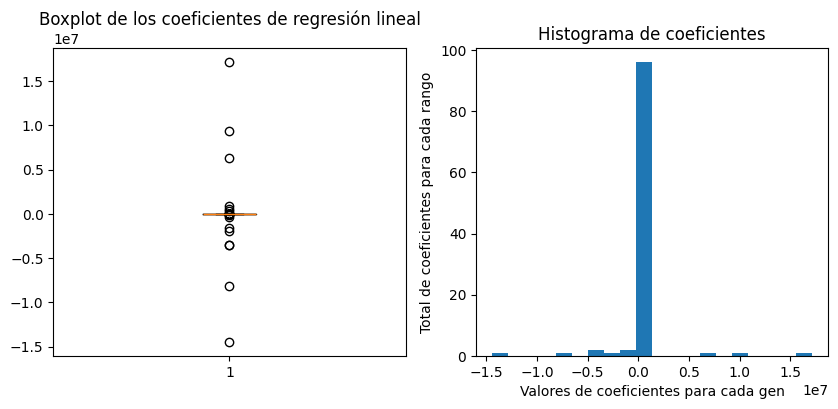

In [77]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(lm.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(lm.coef_,20)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

Se puede observar que la mayoría de coeficientes se concentran en el valor 0, aunque hay valores atípicos de los coeficientes de las variables.

### Modelo con regularización

#### Lasso (L1)

In [32]:
m_lasso = LassoCV(alphas=np.logspace(-6,6,10), cv=5, random_state=42, n_jobs=-1).fit(X_train_sc, y_train)

C:\Users\macar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+00, tolerance: 5.674e-01
  model = cd_fast.enet_coordinate_descent(


In [33]:
y_pred_lasso_train = m_lasso.predict(X_train_sc)
y_pred_lasso_test = m_lasso.predict(X_test_sc)

In [35]:
#MODELO SIN REGULARIZAR
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.999898,0.028195,0.102674
Test set,0.999880,0.037919,0.145764
Diferencia,-0.000018,0.009724,0.043090


In [34]:
#LASS0
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

,R2,Median AE,MAPE
Train set,0.999858,0.033875,0.122003
Test set,0.999903,0.033684,0.131367
Diferencia,0.000045,-0.000191,0.009364


Cómo se puede observar, a través de introducir la penalización Lasso hemos aconseguido que nuestros datos de entrenamiento reduzcan un poco el overfitting, pero por otra parte los datos de prueba son capazes de generalizar más que el modelosin regularizar, por lo tanto podríamos decir que hemos mejorado nuestro algorítmo regressor.

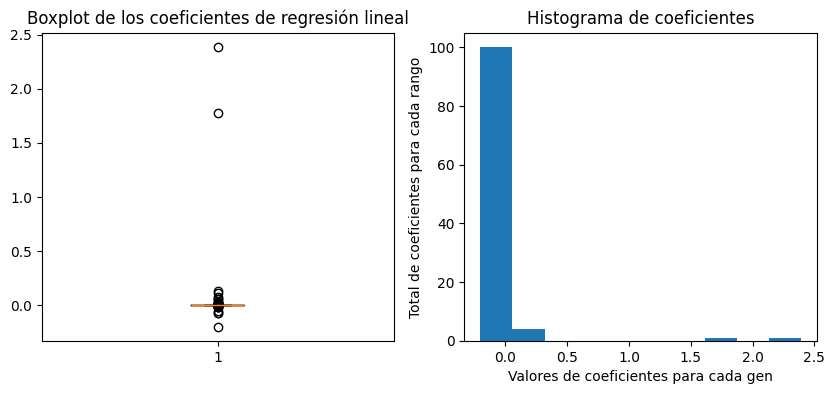

In [48]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [96]:
print(f'Media de los coeficientes modelo Lasso: {round(np.mean(m_lasso.coef_), 4)}',
      f'\nMedia de los coeficientes modelo no regularizado: {round(np.mean(lm.coef_), 4)}')


Media de los coeficientes modelo Lasso: 0.039 
Media de los coeficientes modelo no regularizado: 8999.276


El modelo Lasso ha reducido la media casi hasta 0 de los coefcientes de las variables.

In [75]:
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 45.28%
El modelo utiliza 58 variables.


#### Ridge(L2)

In [81]:
m_ridge = RidgeCV(alphas=np.logspace(-6,6,10), cv=5).fit(X_train_sc, y_train)

In [82]:
y_pred_ridge_train = m_ridge.predict(X_train_sc)
y_pred_ridge_test = m_ridge.predict(X_test_sc)

In [86]:
#MODELO SIN REGULARIZAR
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.999898,0.028195,0.102674
Test set,0.999880,0.037919,0.145764
Diferencia,-0.000018,0.009724,0.043090


In [87]:
#LASS0
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

,R2,Median AE,MAPE
Train set,0.999858,0.033875,0.122003
Test set,0.999903,0.033684,0.131367
Diferencia,0.000045,-0.000191,0.009364


In [83]:
# RIDGE
get_metrics(y_pred_ridge_test, y_test, y_pred_ridge_train, y_train)

,R2,Median AE,MAPE
Train set,0.999886,0.028327,0.110438
Test set,0.999904,0.036360,0.125687
Diferencia,0.000018,0.008033,0.015249


Utilizando el regulizador Ridge, el cuál no penaliza tanto, hemos aconseguido que nuestro algorimto mejore los datosde prueba respecto al modelo sin regularizar, incluso mejorando el resultado de Lasso. Pero por otra parte, el coeficiente de determinación ha aumentado respecto Lasso.

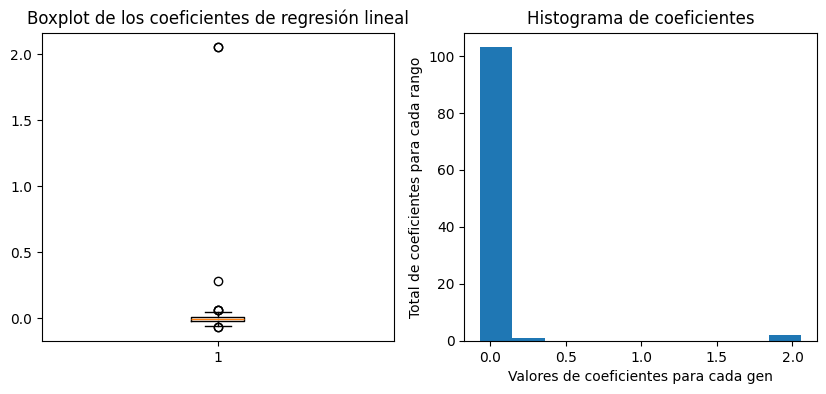

In [84]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [85]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 106 variables.


Este regulizador (Ridge) es menos penalizador que Lasso y eso se observa en qué en este caso el modelo utiliza todas las variables.

### Optimización del Modelo final

Ahora voy a crear un nueva dataset, tanto para el conjunto de prueba como el conjunto de entrenamiento, dónde solo van a contener las variables que el regressor lasso mantiene.

In [88]:
X_train_v1 = X_train_sc[:,np.where(np.abs(m_lasso.coef_)>0)[0]]
X_test_v1 = X_test_sc[:,np.where(np.abs(m_lasso.coef_)>0)[0]]

Por otra parte, voy a utilizar el regressor Ridge, para reducir un possible sobreajuste de mi modelo

In [89]:
m_ridge_v1 = RidgeCV(alphas=np.logspace(-6,6,10), cv=5).fit(X_train_v1, y_train)

In [90]:
y_pred_ridge_train_v1 = m_ridge_v1.predict(X_train_v1)
y_pred_ridge_test_v1 = m_ridge_v1.predict(X_test_v1)

In [91]:
#Modelo optimizado
get_metrics(y_pred_ridge_test_v1, y_test, y_pred_ridge_train_v1, y_train)

,R2,Median AE,MAPE
Train set,0.999878,0.031335,0.113677
Test set,0.999912,0.034384,0.121727
Diferencia,0.000034,0.003049,0.008050


In [92]:
#MODELO SIN REGULARIZAR
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.999898,0.028195,0.102674
Test set,0.999880,0.037919,0.145764
Diferencia,-0.000018,0.009724,0.043090


In [93]:
#LASS0
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

,R2,Median AE,MAPE
Train set,0.999858,0.033875,0.122003
Test set,0.999903,0.033684,0.131367
Diferencia,0.000045,-0.000191,0.009364


In [94]:
# RIDGE
get_metrics(y_pred_ridge_test, y_test, y_pred_ridge_train, y_train)

,R2,Median AE,MAPE
Train set,0.999886,0.028327,0.110438
Test set,0.999904,0.036360,0.125687
Diferencia,0.000018,0.008033,0.015249


Comparando las métricas de los tres modelos podemos observar que con el modelo optimizado hemos reducido el sobreajuste de los datos de entrenamiento, mientras que hemos obtenido el mejor coeficiente de determinación de los 4 modelos utilizados. 